## Customer Analytics 

### Buying Pattern Analysis

### 1. Frequency of Purchase

How often do customers purchase. Buying pattern classified into One-time, Intermittent, Frequent

In [86]:
import pandas as pd
import numpy as np
import os

df = pd.read_excel('/Users/rajeshpillai/Downloads/Online_Retail.xlsx',skiprows=0,header=0)

df = df.dropna()



#### Define Buying Frequency

In [90]:
def buying_freq(count):
    
    if count ==1:
        val = 'one-time'
    
    elif count >6:
        val = 'high-freq'
    
    else :
        val ='intermittent'
    
    return val

In [87]:
df_invoice_by_customer = df.groupby(by=['CustomerID'])\
                           .InvoiceDate\
                           .nunique()\
                           .reset_index()\
                           .sort_values(by=['InvoiceDate'], ascending=False)


df_invoice_by_customer = df_invoice_by_customer.rename(columns={"InvoiceDate":"Count"})

# Reset Index

df_invoice_by_customer = df_invoice_by_customer.reset_index()

# 5 point summary of data

df_invoice_by_customer.Count.describe()

# 75% of the distribution is below 5. We can split the bins into 1,2-5,6+ sizes

# Write a lamda function to populate the same

count    4372.000000
mean        5.039799
std         9.248607
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: Count, dtype: float64

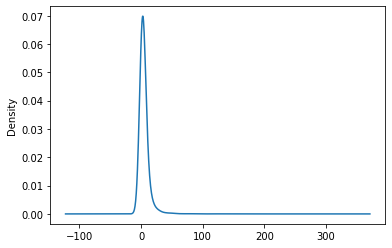

In [88]:
# Plot the data

s = df_invoice_by_customer.Count

ax = s.plot.kde(bw_method=.5)


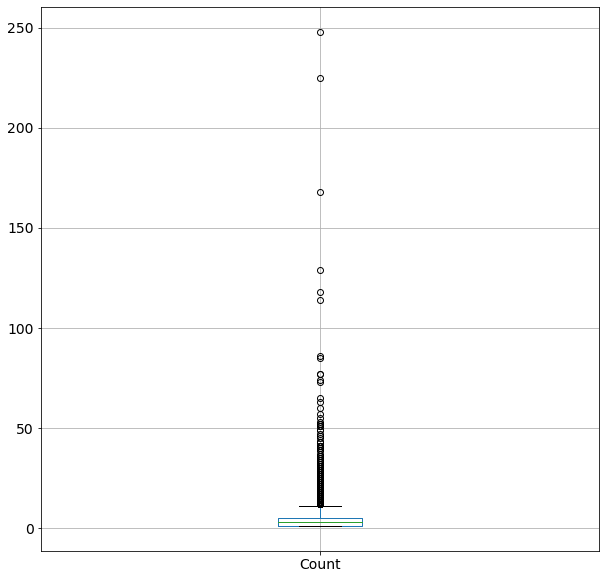

In [89]:
# Boxplot

df_invoice_by_customer.boxplot(column='Count',
                               grid=True,
                               figsize=(10,10),
                               fontsize=14,
                               return_type='axes'
                                      
                              )

In [94]:
# Add New column 'buying_freq'

df_invoice_by_customer['buying_freq'] = df_invoice_by_customer['Count'].apply(buying_freq)

df_invoice_by_customer = df_invoice_by_customer.reset_index()

df_invoice_by_customer.head()

,level_0,index,CustomerID,Count,buying_freq
0,0,1895,14911.0,248,high-freq
1,1,330,12748.0,225,high-freq
2,2,4042,17841.0,168,high-freq
3,3,1674,14606.0,129,high-freq
4,4,2192,15311.0,118,high-freq
